<a href="https://colab.research.google.com/github/juliosdutra/Controle_de_Processos_UFES/blob/main/Miscellaneous/ListaII_sistema_de_press%C3%A3o_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

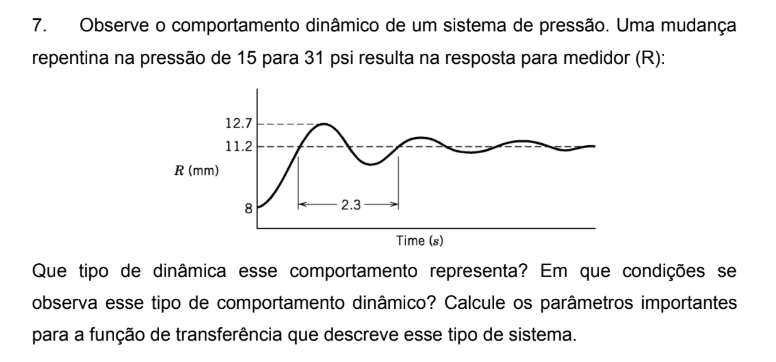


In [1]:
!pip install -qq control

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.6/549.6 kB 5.5 MB/s eta 0:00:00


In [2]:
import numpy as np
import control as ct
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

In [3]:
# Dados do processo
R0 = 8.0
Rfinal = 11.2
Rmax = 12.7

# Ganho estacionário
deltaP = 31-15
deltaR = Rfinal-R0
K = (deltaR)/(deltaP)

# Fator de amortecimento
OS = (Rmax-Rfinal)/(deltaR)
f = lambda xi: OS - np.exp(-np.pi*xi/np.sqrt(1-xi**2))
xi = fsolve(f, 0.5)[0]

# Período natural
P = 2.3
tau = P*np.sqrt(1-xi**2)/(2*np.pi)

# Resultados
print(f'Ganho estacionário, K = {K:1.4f} mm/psi')
print(f'Período natural, tau = {tau:1.4f} s')
print(f'Fator de amortecimento, xi = {xi:1.4f}')

# Função de  transferência
G = ct.tf(K, [tau**2, 2*xi*tau, 1])
G

Ganho estacionário, K = 0.2000 mm/psi
Período natural, tau = 0.3559 s
Fator de amortecimento, xi = 0.2345


TransferFunction(array([0.2]), array([0.12663146, 0.16686409, 1.        ]))

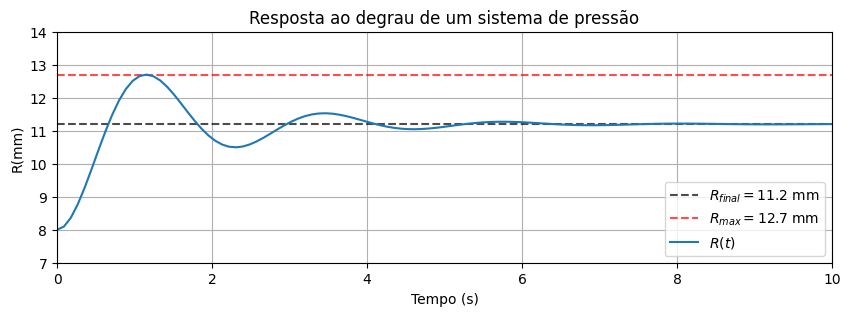

In [4]:
# Simulação do teste
t, y_desvio = ct.step_response(G)
y = deltaP*y_desvio + R0

fig, ax = plt.subplots(1,1, figsize=(10,3))
ax.axhline(Rfinal, linestyle='--', label = r'$R_{final} =$' + f'{Rfinal:1.1f} mm', color='k', alpha=0.7)
ax.axhline(Rmax, linestyle='--', label = r'$R_{max} =$'+f'{Rmax:1.1f} mm', color='r', alpha=0.7)
ax.plot(t, y, label = r'$R(t)$',)
ax.axis([0,10, 7, 14])
ax.set_title('Resposta ao degrau de um sistema de pressão')
ax.set_xlabel('Tempo (s)')
ax.set_ylabel('R(mm)')
ax.legend()
ax.grid()

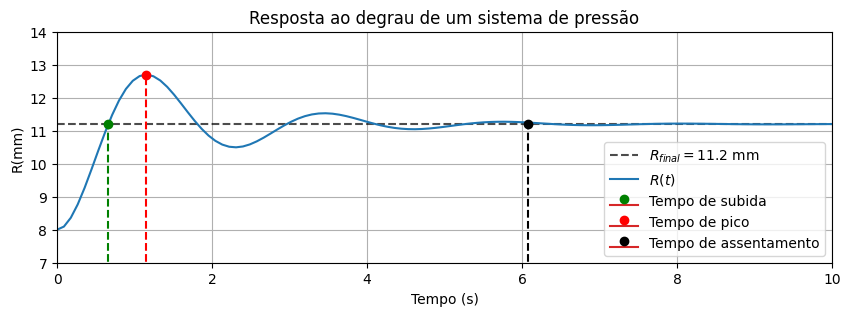

In [22]:
from math import acos, pi

# Outras propriedades
tr = tau/np.sqrt(1-xi**2) * (pi-acos(xi)) # tempo de subida
tp = pi*tau/np.sqrt(1-xi**2) # tempo de pico
ts = 4*tau/xi # tempo de assentamento (+/-2%)


fig, ax = plt.subplots(1,1, figsize=(10,3))
ax.axhline(Rfinal, linestyle='--', label = r'$R_{final} =$' + f'{Rfinal:1.1f} mm', color='k', alpha=0.7)
ax.plot(t, y, label = r'$R(t)$',)
ax.stem(tr,Rfinal,'--Dg', label = 'Tempo de subida',)
ax.stem(tp,Rmax,'--or', label = 'Tempo de pico')
ax.stem(ts,Rfinal,'--sk', label = 'Tempo de assentamento')

ax.axis([0,10, 7, 14])
ax.set_title('Resposta ao degrau de um sistema de pressão')
ax.set_xlabel('Tempo (s)')
ax.set_ylabel('R(mm)')
ax.legend()
ax.grid()

